In [ ]:
# from pylabel import importer
# dataset = importer.ImportVOC(path="/Users/abdulmateen/Downloads/archive/annotations")
# dataset.export.ExportToYoloV5(output_path="/Users/abdulmateen/Downloads/archive/annot_yolov5/annotations",yaml_file="dataset.yaml")

In [ ]:
from shutil import copyfile

In [118]:
from sklearn.model_selection import train_test_split
import numpy as np
import os
image_list = os.listdir("/Users/abdulmateen/Downloads/archive/images")
annot_list = os.listdir("/Users/abdulmateen/Downloads/archive/annot_yolo")
image_list.sort()
annot_list.sort()

train_images,test_images, train_annot, test_annot = train_test_split(image_list,annot_list, test_size=0.5,random_state=42)
train_images,test_images, train_annot, test_annot = train_test_split(train_images,train_annot,test_size=0.3,random_state=42)
test_images.sort()
test_annot.sort()
test_images,valid_images, test_annot, valid_annot = train_test_split(test_images,test_annot,test_size=0.2,random_state=7) 





In [119]:
print(len(train_images))
print(len(train_annot))
print(len(test_images))
print(len(valid_images))

298
298
102
26


In [120]:
def copy_files(file_list, source_folder, dest_folder):
    for file in file_list:
        source_path = os.path.join(source_folder, file)
        dest_path = os.path.join(dest_folder, file)
        copyfile(source_path, dest_path)

In [121]:
train_images_folder = '/Users/abdulmateen/Downloads/archive/train/train_images'
train_annotations_folder = '/Users/abdulmateen/Downloads/archive/train/train_annot'
test_images_folder = '/Users/abdulmateen/Downloads/archive/test/valid_images'
test_annotations_folder = '/Users/abdulmateen/Downloads/archive/test/valid_annot'
valid_images_folder = "/Users/abdulmateen/Downloads/archive/valid/test_images"
valid_annotations_folder = "/Users/abdulmateen/Downloads/archive/valid/test_annot"

In [122]:
os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(train_annotations_folder, exist_ok=True)
os.makedirs(test_images_folder, exist_ok=True)
os.makedirs(test_annotations_folder, exist_ok=True)
os.makedirs(valid_images_folder,exist_ok=True)
os.makedirs(valid_annotations_folder,exist_ok=True)

In [123]:
copy_files(train_images, '/Users/abdulmateen/Downloads/archive/images', train_images_folder)
copy_files(train_annot, "/Users/abdulmateen/Downloads/archive/annot_yolo", train_annotations_folder)

# Copy files to test folders
copy_files(test_images, "/Users/abdulmateen/Downloads/archive/images", test_images_folder)
copy_files(test_annot, "/Users/abdulmateen/Downloads/archive/annot_yolo", test_annotations_folder)

copy_files(valid_images, "/Users/abdulmateen/Downloads/archive/images", valid_images_folder)
copy_files(valid_annot, "/Users/abdulmateen/Downloads/archive/annot_yolo", valid_annotations_folder)

In [2]:
from ultralytics import YOLO

# Load a model
# model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)

# Train the model with 2 GPUs
!yolo task=detect mode=train model=yolov8m.pt data=dataset.yaml epochs=25 imgsz=300

Ultralytics YOLOv8.0.219 🚀 Python-3.9.15 torch-1.13.0.dev20220901 CPU (arm64)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=dataset.yaml, epochs=25, patience=50, batch=16, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

In [12]:
from PIL import Image
from IPython.display import display, Image

In [4]:
!ls runs

detect mlflow


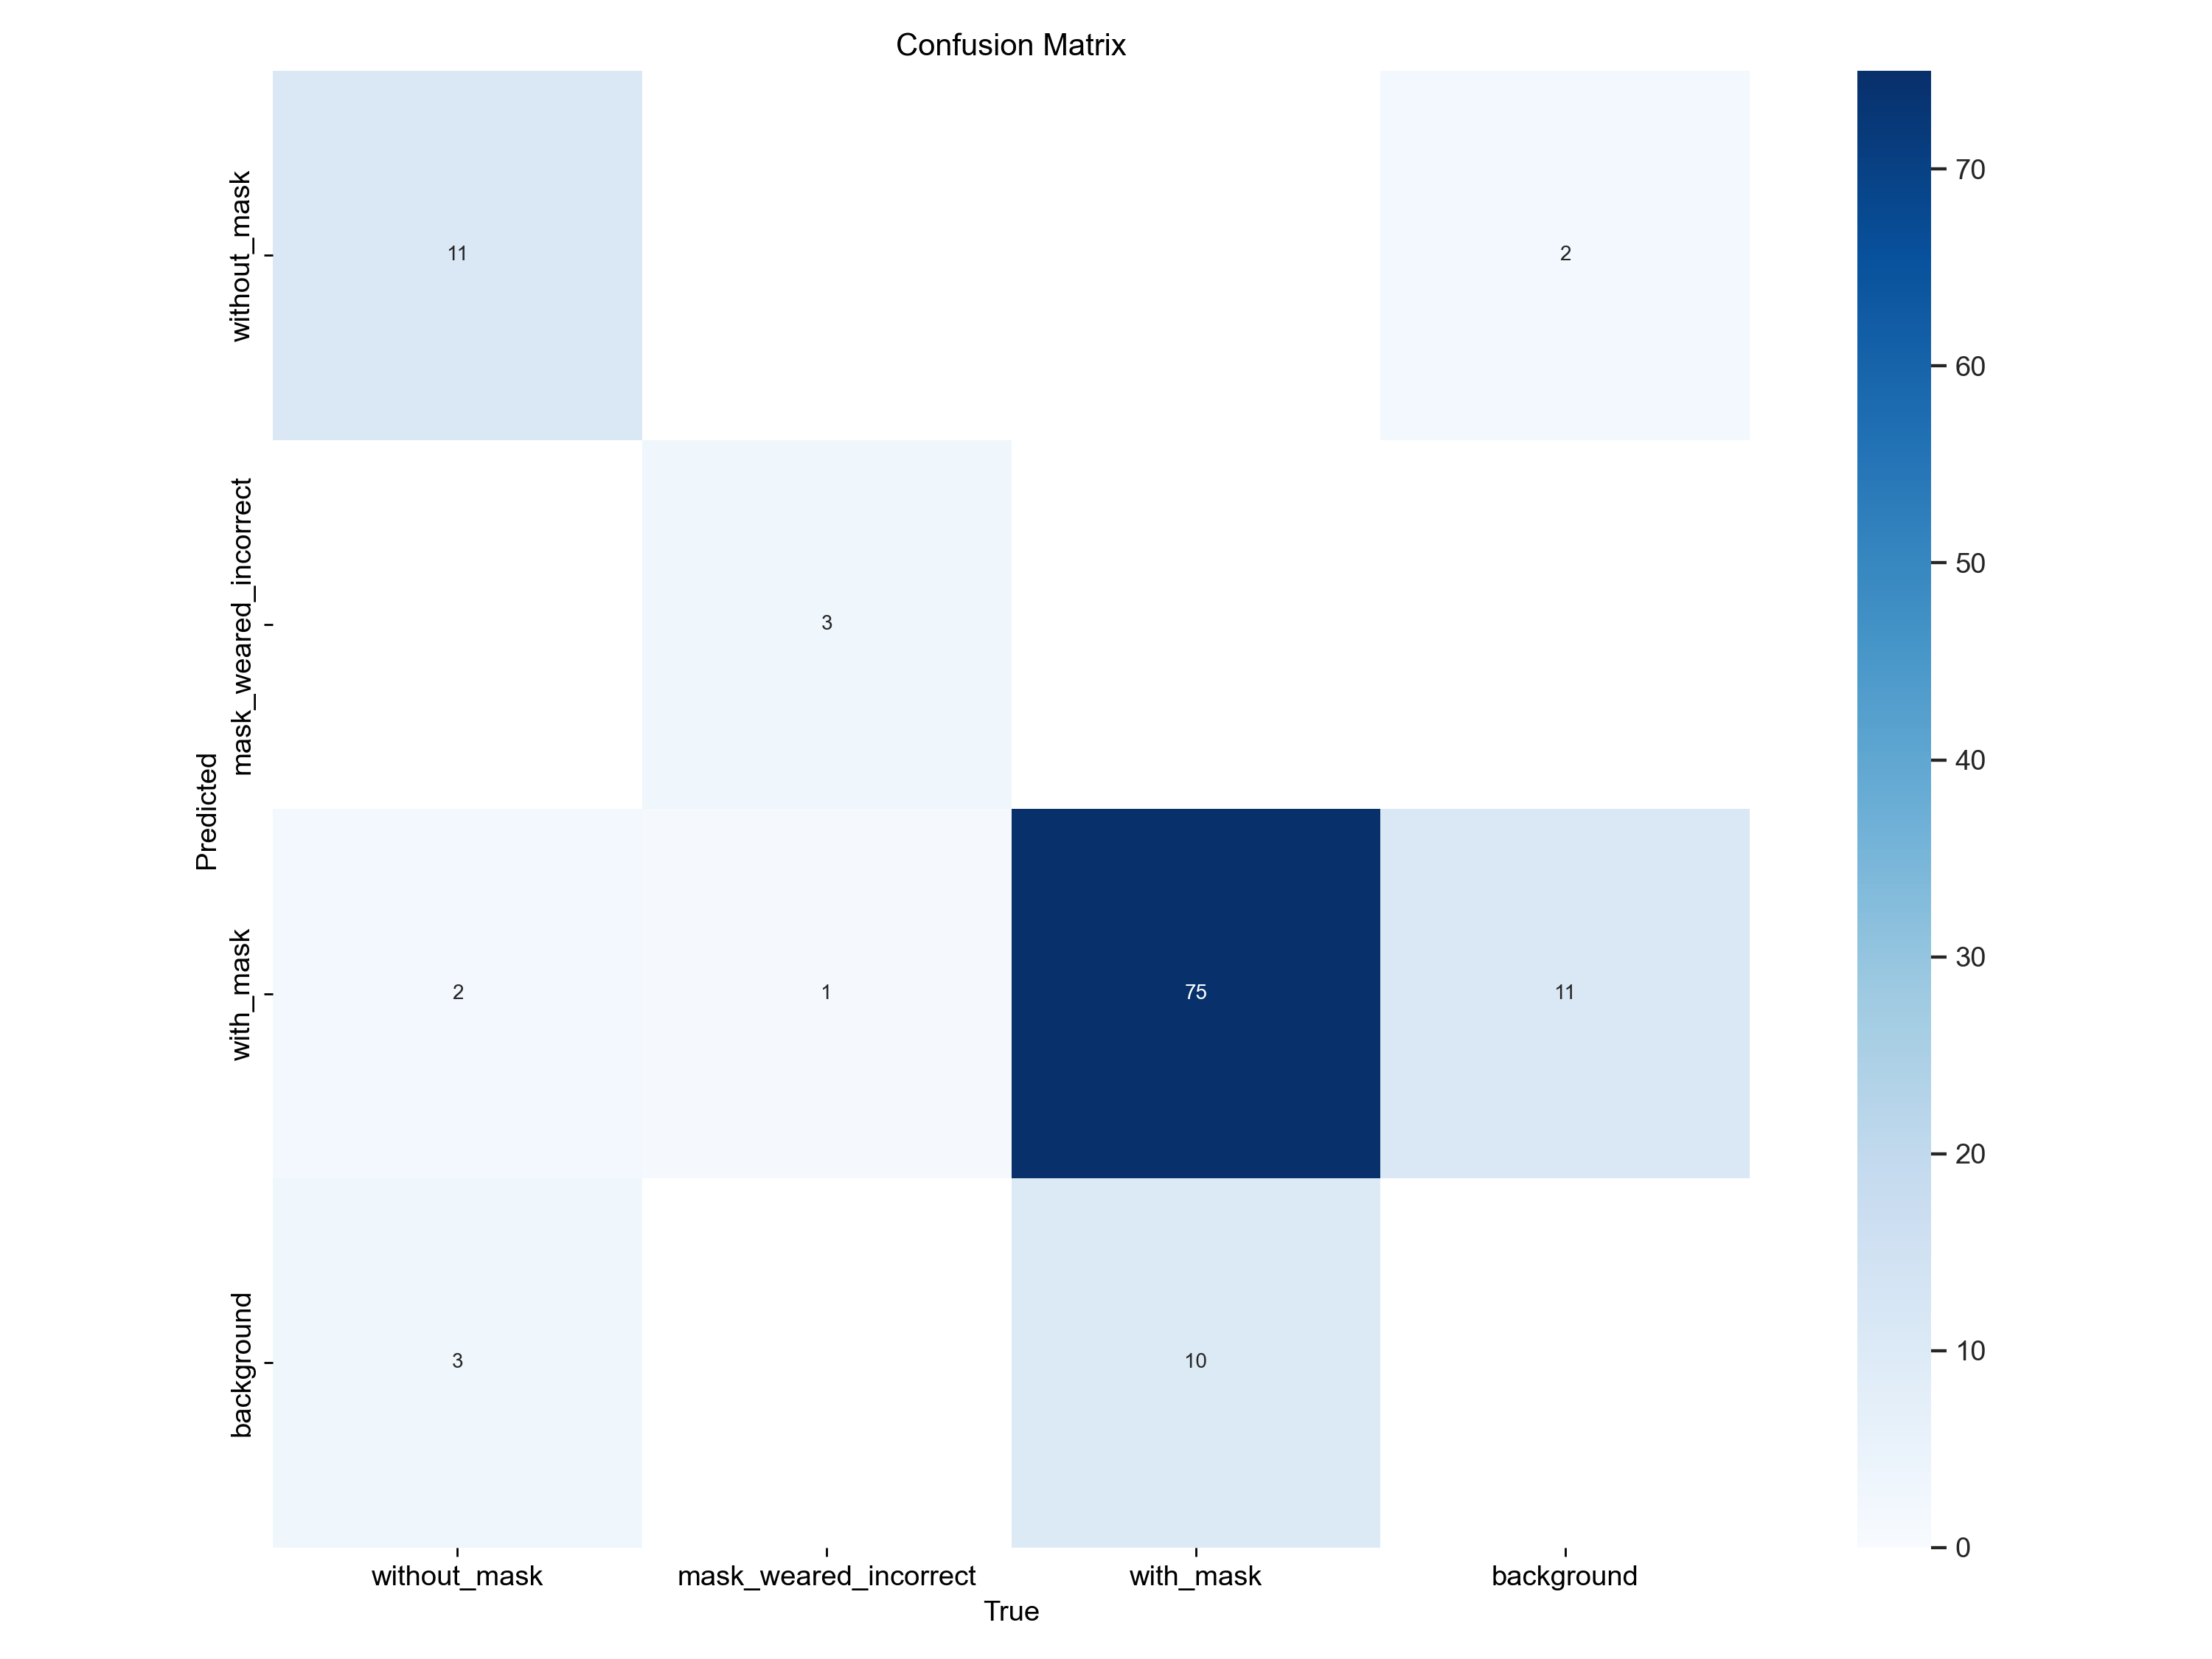

In [14]:
Image(filename='runs/detect/train9/confusion_matrix.png',width=600)

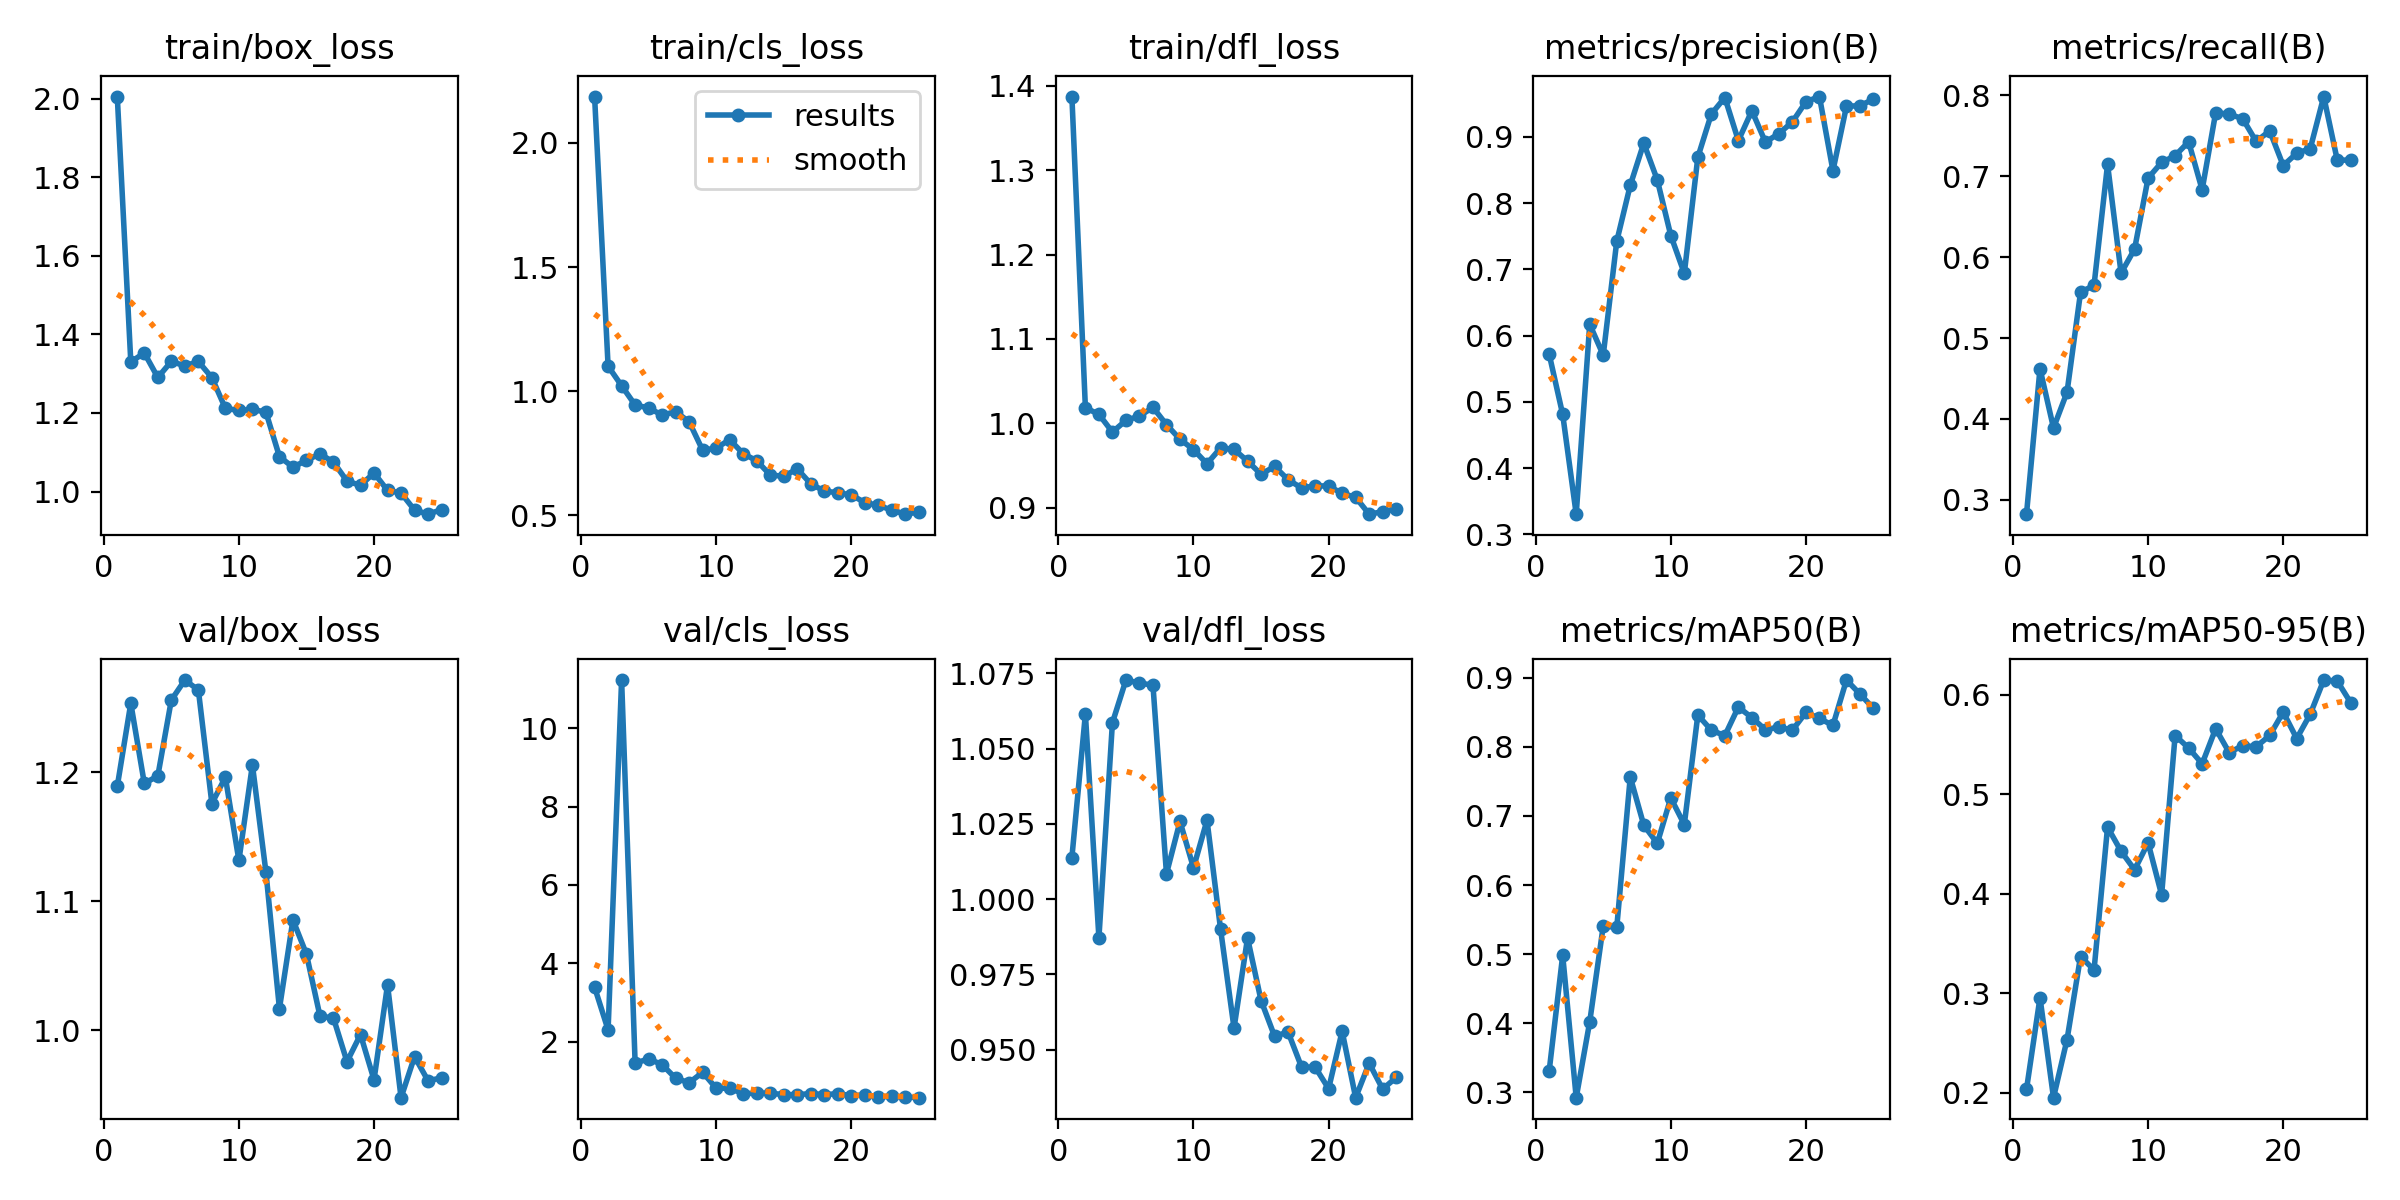

In [16]:
Image(filename='runs/detect/train9/results.png',width=600)

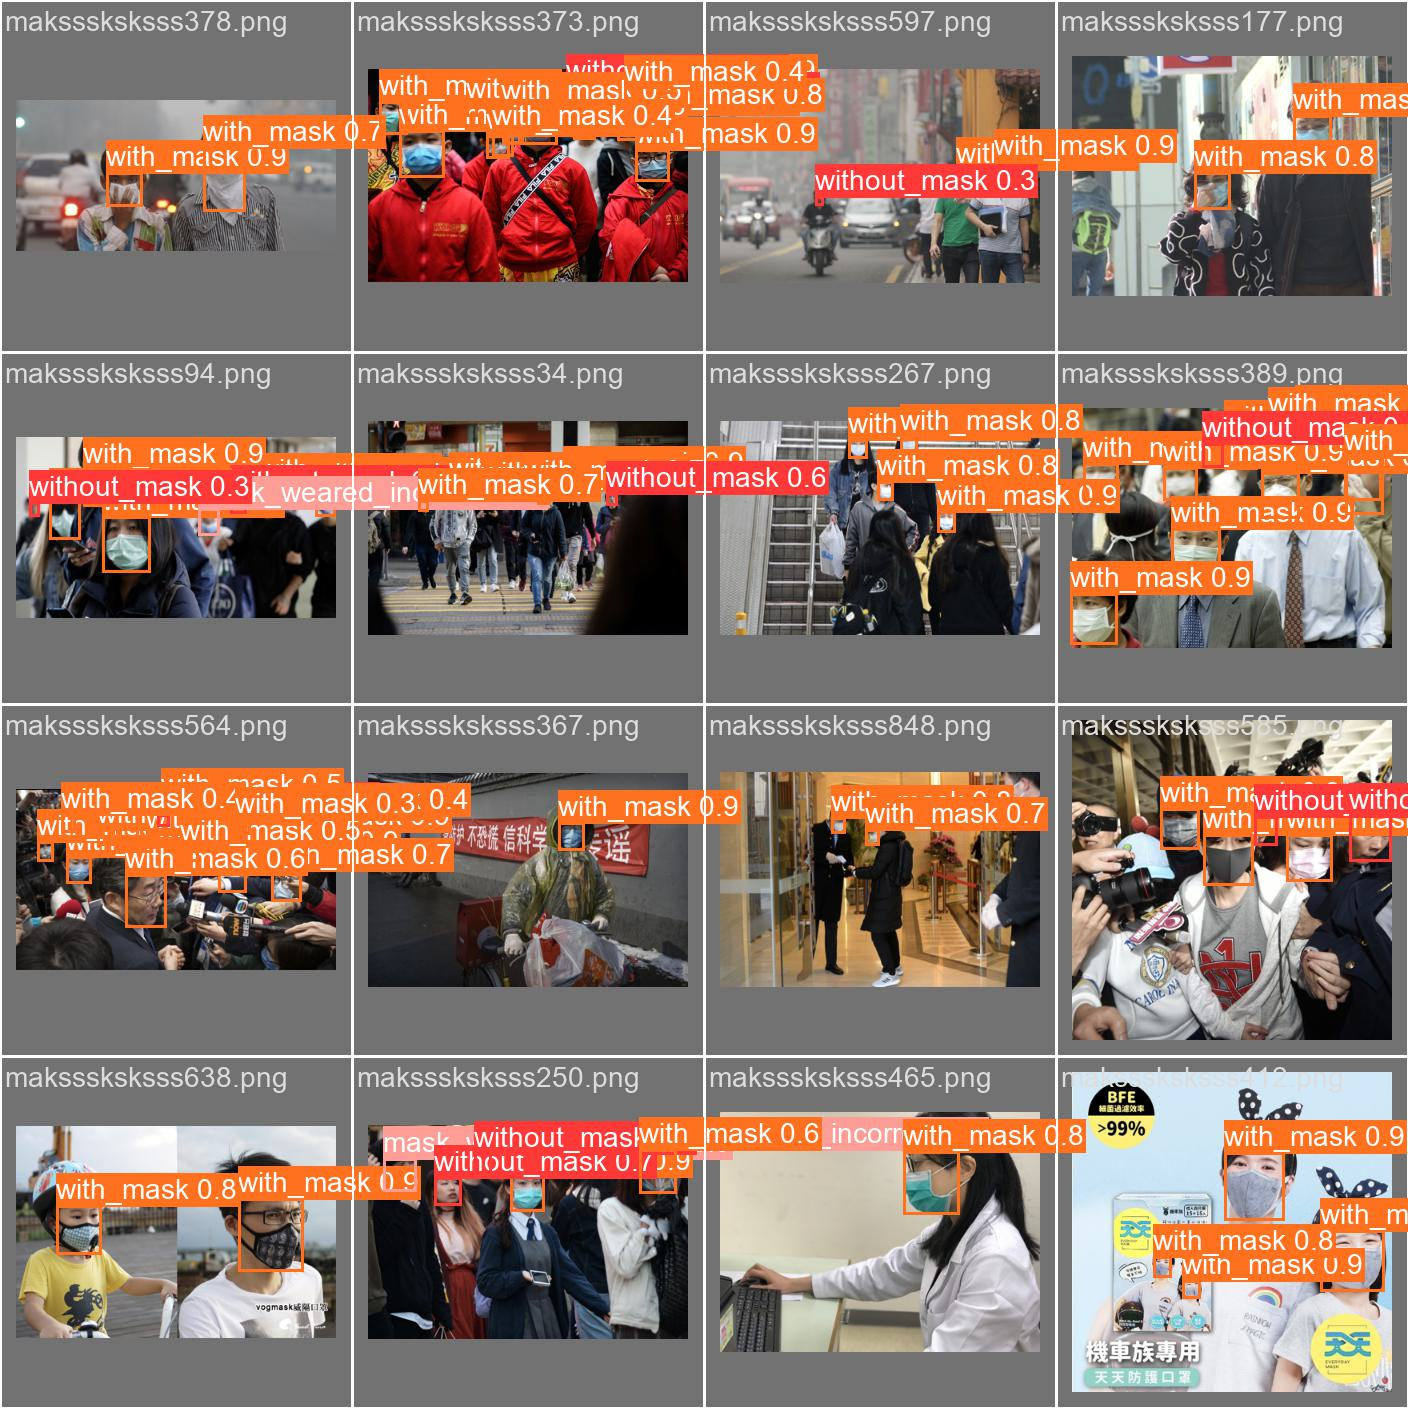

In [17]:
Image(filename='runs/detect/train9/val_batch0_pred.jpg',width=600)

In [18]:
!yolo task=detect mode=val model=runs/detect/train9/weights/best.pt data=dataset.yaml

Ultralytics YOLOv8.0.219 🚀 Python-3.9.15 torch-1.13.0.dev20220901 CPU (arm64)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
Fontconfig warning: ignoring UTF-8: not a valid region tag
val: Scanning /Users/abdulmateen/Downloads/archive/valid/labels.cache... 26 imag
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         26        105      0.947      0.799      0.897      0.615
          without_mask         26         16      0.976      0.688       0.81      0.524
 mask_weared_incorrect         26          4          1       0.85      0.995      0.677
             with_mask         26         85      0.863      0.859      0.885      0.645
Speed: 0.7ms preprocess, 369.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /Users/abdulmateen/tensorflow-test/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [19]:
!yolo task=detect mode=predict model=runs/detect/train9/weights/best.pt conf=0.25 source=/Users/abdulmateen/Downloads/archive/test/images

Ultralytics YOLOv8.0.219 🚀 Python-3.9.15 torch-1.13.0.dev20220901 CPU (arm64)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

image 1/102 /Users/abdulmateen/Downloads/archive/test/images/maksssksksss1.png: 128x320 1 without_mask, 7 with_masks, 52.5ms
image 2/102 /Users/abdulmateen/Downloads/archive/test/images/maksssksksss109.png: 320x320 1 with_mask, 103.5ms
image 3/102 /Users/abdulmateen/Downloads/archive/test/images/maksssksksss11.png: 224x320 1 without_mask, 1 mask_weared_incorrect, 25 with_masks, 158.1ms
image 4/102 /Users/abdulmateen/Downloads/archive/test/images/maksssksksss115.png: 224x320 11 with_masks, 144.1ms
image 5/102 /Users/abdulmateen/Downloads/archive/test/images/maksssksksss117.png: 320x256 1 with_mask, 125.0ms
image 6/102 /Users/abdulmateen/Downloads/archive/test/images/maksssksksss127.png: 320x224 1 with_mask, 285.9ms
image 7/102 /Users/abdulmateen/Downloads/archive/test/images/maksssksksss139.png: 192x320 1 without_mask, 1 mask_wea

In [20]:
clas = ['without_mask','mask_weared_incorrect','with_mask']

In [23]:
clas[1]

'mask_weared_incorrect'